# CartoLayer

Render cloud from a CARTO connection using deck.gl [CartoLayer](https://deck.gl/docs/api-reference/carto/carto-layer).

In [ ]:
import pydeck as pdk
from carto_auth import CartoAuth
from pydeck_carto import register_carto_layer, get_layer_credentials
from pydeck_carto.layer import MapType, CartoConnection

In [ ]:
carto_auth = CartoAuth.from_oauth()

In [ ]:
register_carto_layer()

## CARTO DW

Every CARTO account has a **CARTO Data Warehouse** to work with. In this example, a table with world airports from the CARTO DW is rendered.

In [ ]:
layer = pdk.Layer(
    "CartoLayer",
    data="carto-demo-data.demo_tables.world_airports",
    type_=MapType.TABLE,
    connection=CartoConnection.CARTO_DW,
    credentials=get_layer_credentials(carto_auth),
    get_fill_color=[238, 77, 90],
    point_radius_min_pixels=2.5,
    pickable=True,
)

view_state = pdk.ViewState(latitude=0, longitude=0, zoom=1)

tooltip = {"html": "<b>Name:</b> {name}", "style": {"color": "white"}}

pdk.Deck(
    layer, map_style=pdk.map_styles.ROAD, initial_view_state=view_state, tooltip=tooltip
)

## Data Warehouses

CARTO allows rendering cloud data from **BigQuery, Snowflake, Redshift, Postgres and Databricks** using custom connections.

This example performs a spatial intersection to display the airports in Spain. Note that it uses a BigQuery connection called "bigquery".

In [ ]:
layer = pdk.Layer(
    "CartoLayer",
    data="""
        SELECT a.geom, a.name
        FROM `carto-demo-data.demo_tables.world_airports` AS a,
             `carto-do-public-data.natural_earth.geography_glo_admin0countries_410` AS g
        WHERE g.ADMIN = 'Spain' AND
              ST_INTERSECTS(a.geom, g.geom)
    """,
    type_=MapType.QUERY,
    connection=pdk.types.String("bigquery"),
    credentials=get_layer_credentials(carto_auth),
    get_fill_color=[238, 77, 90],
    point_radius_min_pixels=2.5,
    pickable=True,
)

view_state = pdk.ViewState(latitude=36, longitude=-7.44, zoom=4)

tooltip = {"html": "<b>Name:</b> {name}", "style": {"color": "white"}}

pdk.Deck(
    layer, map_style=pdk.map_styles.ROAD, initial_view_state=view_state, tooltip=tooltip
)

### Error management

Any data error is displayed instead of the map to provide instant feedback about the input parameters. For example, the user is not authorized, the connection or the column names do not exist, etc.

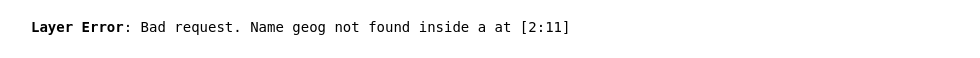